# Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import LogNorm
plt.rcParams.update({'font.size': 12})
import matplotlib.colors as mpc
import seaborn as sns

# Load Data

In [2]:
# quick double check of rescanned names/services
# confirms the certificate reuse and that certs rotated, when we saw differences

In [3]:
tls_col_names = ['domain',
 'type',
 'd',
 'dt',
 'certsize',
 'tbssize',
 'subjcn',
 'subjhash',
 'subjk',
 'subjsize',
 'isscn',
 'isshash',
 'issk',
 'isssize',
 'keyalg',
 'keybits',
 'pubkinfosize',
 'nby',
 'nbts',
 'nay',
 'nats',
 'sancount',
 'sansize',
 'sctcount',
 'sctsize',
 'extssize',
 'sigalg',
 'sigsize',
 'validation',
 'precert',
 'ca',
 'hash']

In [4]:
tls_rescan = "../data/csv/https_parsed_certs_rescan.csv.zst"

def read_csv_tls_certs(fname):
    
    print(fname)
    df_chunk = pd.read_csv(fname, names=tls_col_names, sep="|", header=None, index_col=None)
    
    # explicitly cast columns to categories
    for col in ["domain","isscn","isshash","issk",]:
        df_chunk[col] = df_chunk[col].astype("category")
    
    # explicitly cast columns to small numeric types
    for col in ["d", "dt", "certsize", "tbssize", "subjsize",
                "isssize", "keybits", "pubkinfosize", "nby",
                "nbts", "nay", "nats", "sancount", "sansize",
                "sctcount", "sctsize", "extssize", "sigsize",]:
        
        df_chunk[col] = pd.to_numeric(df_chunk[col], downcast="integer")

    return df_chunk

df_tls = read_csv_tls_certs(tls_rescan)
df_tls

../data/csv/https_parsed_certs_rescan.csv.zst


,domain,type,d,dt,certsize,tbssize,subjcn,subjhash,subjk,subjsize,...,sansize,sctcount,sctsize,extssize,sigalg,sigsize,validation,precert,ca,hash
0,0.discoverapp.com,INTM,0,1,1205,925,DigiCert SHA2 High Assurance Server CA,cf26f518fac97e8f8cb342e01c2f6a109e8e5f0a,5168ff90af0207753cccd9656462a212b859723b,114,...,0,0,0,242,SHA256-RSA,256,UnknownValidationLevel,False,True,19400be5b7a31fb733917700789d2f0a2471c0c9d506c0...
1,0.discoverapp.com,LEAF,1,1,1773,1493,*.discoverapp.com,90e312bac6593724b8fa581ba6ee5edd29629ee8,d670f6d0d7d3f78f2a6f00f50edf1690dbcf20e3,110,...,59,3,366,783,SHA256-RSA,256,OV,False,False,49446ee02cb8030c9f35add3f1c99e2e731934f84bdbd9...
2,0dytt.com,INTM,0,2,1382,1102,GTS Root R1,3091c2d60f82ea189edb13b0755d9b046e67f050,e4af2b26711a2b4827852f52662ceff08913713e,73,...,0,0,0,234,SHA256-RSA,256,OV,False,True,3ee0278df71fa3c125c4cd487f01d774694e6fc57e0cd9...
3,0dytt.com,INTM,1,2,1434,898,GTS CA 1C3,c72e798addff6134b3baed4742b8bbc6c0240763,8a747faf85cdee95cd3d9cd0e24614f371351d27,72,...,0,0,0,297,SHA256-RSA,512,OV,False,True,23ecb03eec17338c4e33a6b48a41dc3cda12281bbc3ff8...
4,0dytt.com,LEAF,2,2,1511,1231,dns.google,9a822e8effc9f4f531ea65cea27e5e285c4f85e8,c33dcc5c17221e439cc8247fa40f95e37f305eaa,23,...,164,2,245,646,SHA256-RSA,256,DV,False,False,ed06f8940802e18bf03e012c75bec86f08d4fbecc4f7ce...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27963,zreading.cn,INTM,1,2,1306,770,R3,48dac9a0fb2bd32d4ff0de68d2f567b735f9b3c4,142eb317b75856cbae500940e61faf9d8b14c2c6,52,...,0,0,0,177,SHA256-RSA,512,DV,False,True,67add1166b020ae61b8f5fc96813c04c2aa58996079686...
27964,zreading.cn,LEAF,2,2,1369,1089,www.zreading.cn,fe6619937d2f08661680b85c05a512c507b0e49c,7c65cb69dce0a4149eaca46acb882020f90533eb,28,...,68,2,245,529,SHA256-RSA,256,DV,False,False,a6c603d8015f78b39fa5431e2adf04986fe3516f217c19...
27965,zoppamedcomm.com,INTM,0,2,1380,1100,ISRG Root X1,281aea4e6a11200e3949b766237385489c2e8792,79b459e67bb6e5e40173800888c81a58f6e99b6e,81,...,0,0,0,248,SHA256-RSA,256,DV,False,True,6d99fb265eb1c5b3744765fcbc648f3cd8e1bffafdc4c2...
27966,zoppamedcomm.com,INTM,1,2,1306,770,R3,48dac9a0fb2bd32d4ff0de68d2f567b735f9b3c4,142eb317b75856cbae500940e61faf9d8b14c2c6,52,...,0,0,0,177,SHA256-RSA,512,DV,False,True,67add1166b020ae61b8f5fc96813c04c2aa58996079686...


### TLS Rescan

In [5]:
df_quic = pd.read_pickle(f"../data/pkl/df_quicreach_handshakes.pkl.zst")
df_quic.head()

,domain,rtt,sent_tls_payload,recv_tls_payload,handshake_tag,sent_udp_payload,recv_udp_payload,ampl_factor,initial_size
0,0-1xbet.best,8.486000,288,2656,Amplification,1220,5118,4.2,1200
1,0-1xbet.best,16.799999,288,2654,Amplification,1220,5116,4.2,1212
2,0-1xbet.best,23.701000,288,2656,Amplification,1222,5118,4.2,1222
3,0-1xbet.best,8.466000,288,2655,Amplification,1232,5117,4.2,1232
4,0-1xbet.best,10.727000,288,2656,Amplification,1242,5118,4.1,1242


In [6]:
df_tls_leaf = df_tls[df_tls["type"]=="LEAF"]
df_tls_leaf

,domain,type,d,dt,certsize,tbssize,subjcn,subjhash,subjk,subjsize,...,sansize,sctcount,sctsize,extssize,sigalg,sigsize,validation,precert,ca,hash
1,0.discoverapp.com,LEAF,1,1,1773,1493,*.discoverapp.com,90e312bac6593724b8fa581ba6ee5edd29629ee8,d670f6d0d7d3f78f2a6f00f50edf1690dbcf20e3,110,...,59,3,366,783,SHA256-RSA,256,OV,False,False,49446ee02cb8030c9f35add3f1c99e2e731934f84bdbd9...
4,0dytt.com,LEAF,2,2,1511,1231,dns.google,9a822e8effc9f4f531ea65cea27e5e285c4f85e8,c33dcc5c17221e439cc8247fa40f95e37f305eaa,23,...,164,2,245,646,SHA256-RSA,256,DV,False,False,ed06f8940802e18bf03e012c75bec86f08d4fbecc4f7ce...
6,0.freebasics.com,LEAF,1,1,1788,1508,*.freebasics.com,14bf504afbb1d9dcda1454804a501645eb063f04,fe273a00de223a4888835a57ea417a3d20325fc4,109,...,74,3,367,799,SHA256-RSA,256,OV,False,False,77bce60e23ecbf72ddbe3185f344d0afe5756ac82fe699...
10,1-11klasses.ru,LEAF,3,3,975,852,*.1-11klasses.ru,47eb15a87228c5e5d3436c4a1bfb51bd7818d10e,7de46a5f2e41b9045f5496004f470345560b6c2f,29,...,36,2,245,497,ECDSA-SHA384,104,DV,False,False,a83366cdc368a135aef239e75fa8e3434747a8ee5bcfbe...
14,0olut8.cn,LEAF,3,3,959,837,*.0olut8.cn,15bd259d394bfb23c578ba5f96e4742f1ccf7880,29472d270d021ace34f49f73be445ae08a5b064c,24,...,26,2,245,487,ECDSA-SHA384,103,DV,False,False,11d0e5368f44691d0ad5495b22c20603044b31b622dab3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27956,zynamics.com,LEAF,2,2,6703,6423,misc-sni.google.com,7468bfb46c305a6ef60e124c819193bf0c64ecaa,ffb229f9a070462093ad7c236f2b94c5191f6250,32,...,5547,2,246,6030,SHA256-RSA,256,DV,False,False,9efbf0467571ff0572be02792550b160ec72a737f7d654...
27958,zzoomit.com,LEAF,1,1,1337,1247,sni.cloudflaressl.com,692dd356163caca0af452c8e0a0e19c97807ea59,e9d7072e062d1c5abca01449f21b589687000e46,119,...,53,3,366,770,ECDSA-SHA256,71,OV,False,False,921cfa557031c272cf8d0dd5967b4b1e18587bafbd8d52...
27961,ytadblock.com,LEAF,2,2,1315,1035,ytadblock.com,3c1bd401cc019aafcc56be0d87d6e5ff6fd05db6,8077b3a33885ed20c087aa1ba56e62640c8ed0eb,26,...,17,2,244,477,SHA256-RSA,256,DV,False,False,0014083ae5c17536371e94d8cf1dcc4fa5912669fa4ff3...
27964,zreading.cn,LEAF,2,2,1369,1089,www.zreading.cn,fe6619937d2f08661680b85c05a512c507b0e49c,7c65cb69dce0a4149eaca46acb882020f90533eb,28,...,68,2,245,529,SHA256-RSA,256,DV,False,False,a6c603d8015f78b39fa5431e2adf04986fe3516f217c19...


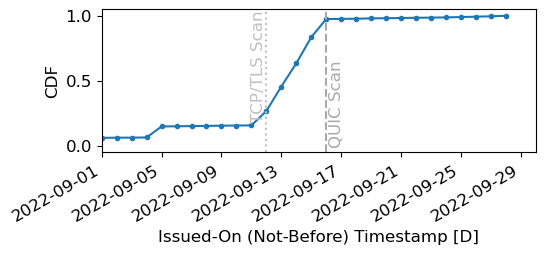

In [7]:
ax = pd.to_datetime(df_tls_leaf["nbts"], unit="s").dt.normalize().value_counts(
        normalize=True).sort_index().cumsum().plot(
            logy=False, marker=".", figsize=(8*0.7,3*0.7),
            ylabel="CDF", xlabel="Issued-On (Not-Before) Timestamp [D]")

ax.set_xlim("2022-09-01", "2022-09-30")
ax.axvline("2022-09-12", c="silver", linestyle="dotted") # tls_scan
ax.axvline("2022-09-16", c="darkgrey", linestyle="dashed") # quic scan

ax.text("2022-09-11", 0.2, "TCP/TLS Scan",  c="silver", rotation=90)
ax.text("2022-09-16 05:00:00", 0.01, "QUIC Scan",  c="darkgrey", rotation=90)

fig = ax.get_figure()
# fig.savefig(f"barh_openssl_cert_bytes_types.png", bbox_inches='tight', dpi=200)
plt.show()
plt.close(fig)

# QScanner recheck

In [8]:
df_qscanner = pd.read_pickle(f"../data/pkl/df_qscanner.pkl.zst")
df_qscanner.head()

,hostname,certificateHashes
0,slotv-online.xyz,9556295934cfe04c2505bbdbe8500a662c5b1056175893...
0,slotv-online.xyz,3abbe63daf756c5016b6b85f52015fd8e8acbe277c5087...
1,multilotto.com,c5afb3820d93b2dc12750c63a680ae76a63a1c46eec958...
1,multilotto.com,3abbe63daf756c5016b6b85f52015fd8e8acbe277c5087...
2,1xbet-new.ru,12571197245ee35dff7af19db47226ae5ef5d2ef04e6b8...


In [9]:
df_tls_leaf["hash"].isin(df_qscanner["certificateHashes"]).value_counts(normalize=True)*100

True     85.632442
False    14.367558
Name: hash, dtype: float64

In [10]:
df_tls_leaf["hash"].isin(df_qscanner["certificateHashes"]).value_counts()

True     7623
False    1279
Name: hash, dtype: int64

In [11]:
# rougly estimate for the total QUIC services?
1279/272000*100

0.47022058823529406